In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('Car Sale.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [62]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [63]:
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [64]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [65]:
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
dealer_avg_price

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

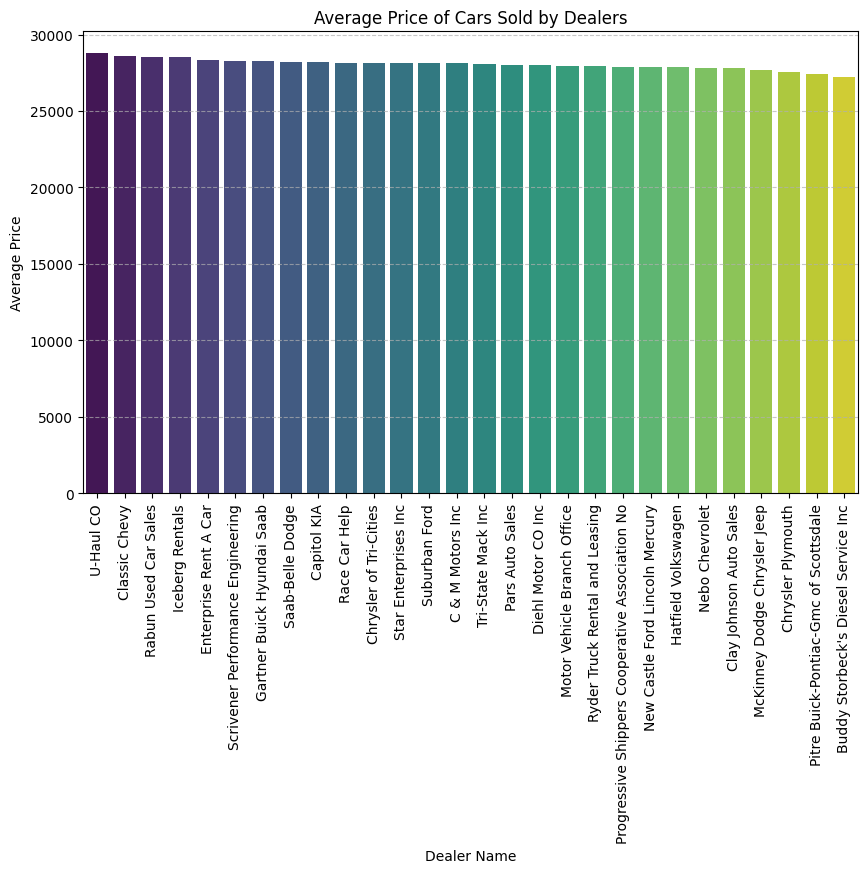

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x=dealer_avg_price.index, y=dealer_avg_price.values, palette='viridis')
plt.title('Average Price of Cars Sold by Dealers')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [67]:
# Insights>>
# The dealer U-Haul CO has the highest average selling price of $28,770.
# Dealers like Classic Chevy, Rabun Used Car Sales, and Iceberg Rentals follow closely with average prices around $28,500.
# There is noticeable variability in average prices across dealers.

Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [68]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

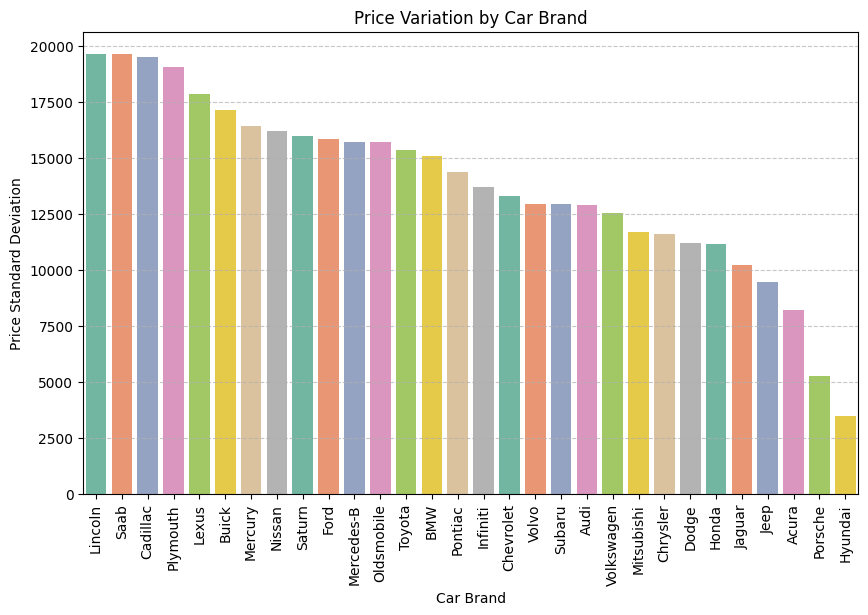

In [69]:
# Std deviation of prices for each car brand
brand_price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
brand_price_variation

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data = brand_price_variation, palette='Set2')
plt.title('Price Variation by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price Standard Deviation')
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [70]:
# The car brand Lincoln exhibits the highest variation in prices, with a standard deviation of approximately $19,658.

Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

In [71]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [72]:
df['Transmission'].value_counts()

Transmission
Auto      12571
Manual    11335
Name: count, dtype: int64

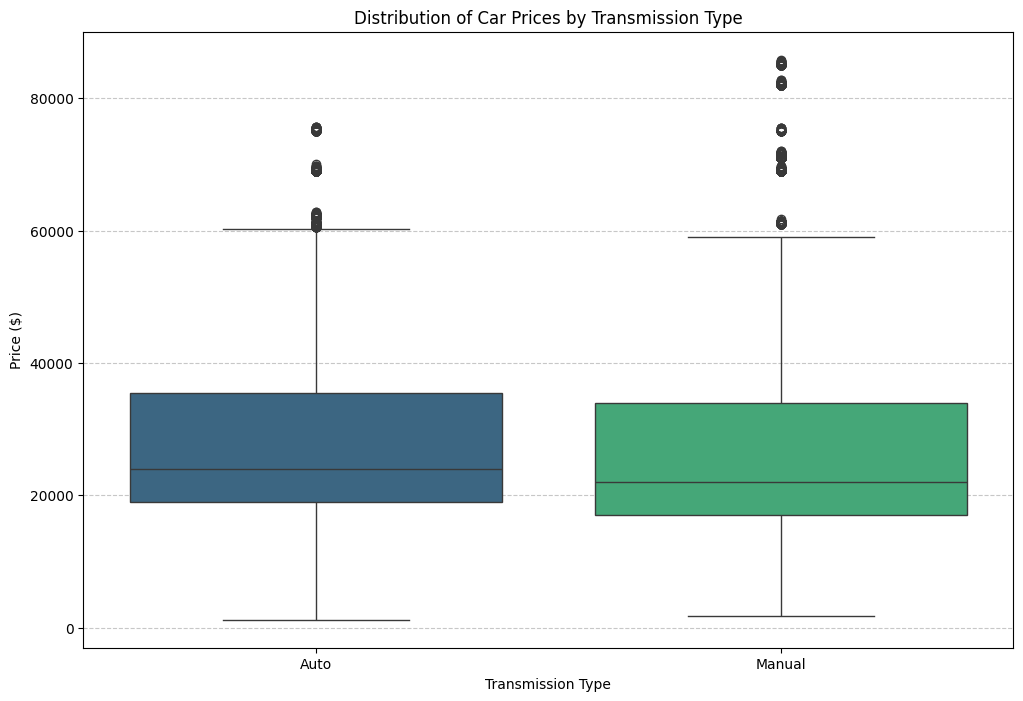

In [73]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='viridis')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [74]:
# Insights >>
# The interquartile range (IQR) is represented by the height of each box, showing the range between the 25th and 75th percentiles.
# The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively.
# Any points outside the whiskers are considered outliers.

# Calculate median and IQR for each transmission type
transmission_stats = df.groupby('Transmission')['Price ($)'].describe()
transmission_stats['IQR'] = transmission_stats['75%'] - transmission_stats['25%']


pd.DataFrame(transmission_stats[['50%', 'IQR']])

,50%,IQR
Transmission,,
Auto,24000.0,16500.0
Manual,22001.0,17000.0


Q4. What is the distribution of car prices across different regions


In [75]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [76]:
df.groupby('Dealer_Region')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


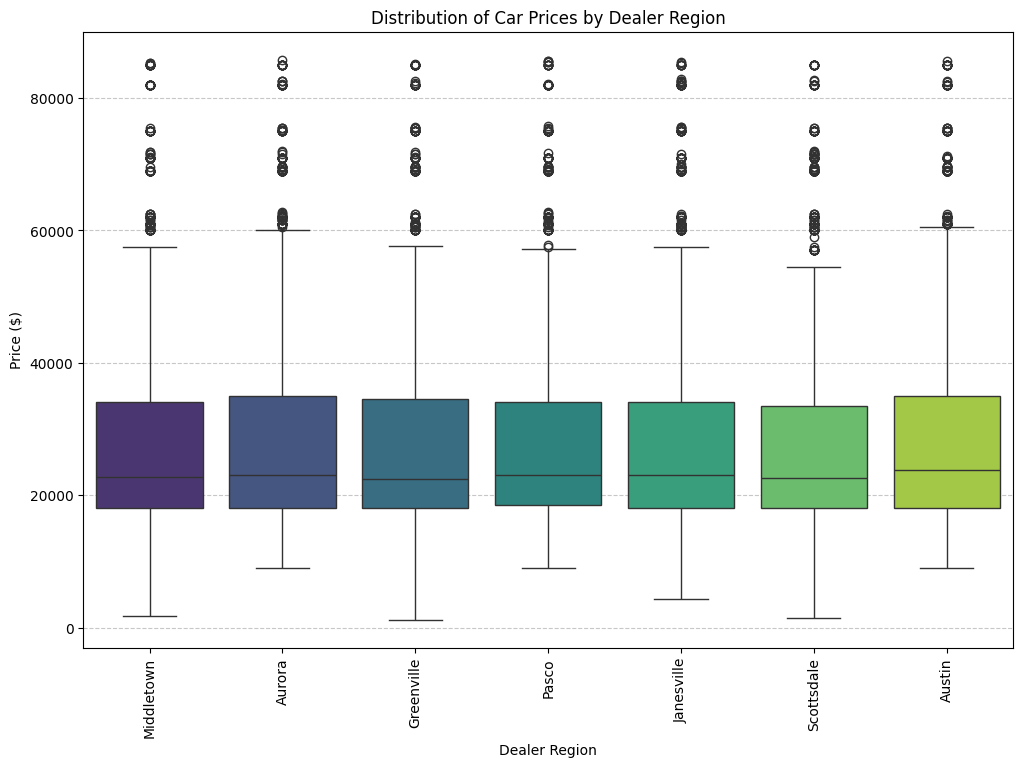

In [77]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='viridis')
plt.title('Distribution of Car Prices by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [78]:
# Insights >>
# 1. The distribution of car prices varies significantly across different dealer regions.
# 2. Some regions have a wider interquartile range (IQR), indicating more variability in car prices within those regions.
# 3. Regions with higher median prices can be identified by the position of the median line within the box.
# 4. Outliers are present in several regions, indicating that there are some cars priced significantly higher or lower than the majority.
# 5. The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively.
# 6. Regions with a smaller IQR have more consistent pricing, while those with a larger IQR show greater price dispersion.

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

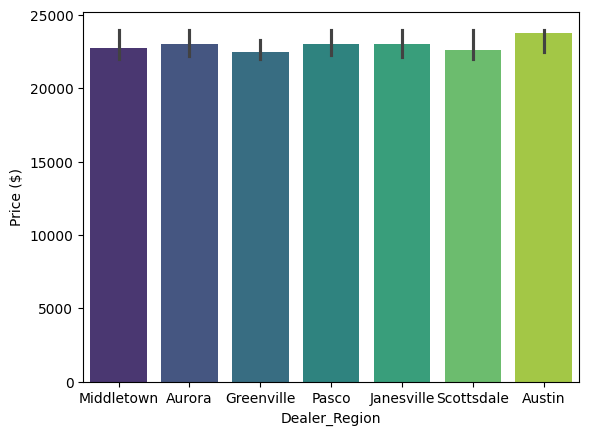

In [79]:
sns.barplot(data=df, x='Dealer_Region', y='Price ($)', estimator=np.median, palette='viridis')

Q5.  What is the distribution of cars based on body styles

In [80]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [81]:
Dist_based_on_bodyStyles = df['Body Style'].value_counts()
Dist_based_on_bodyStyles

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

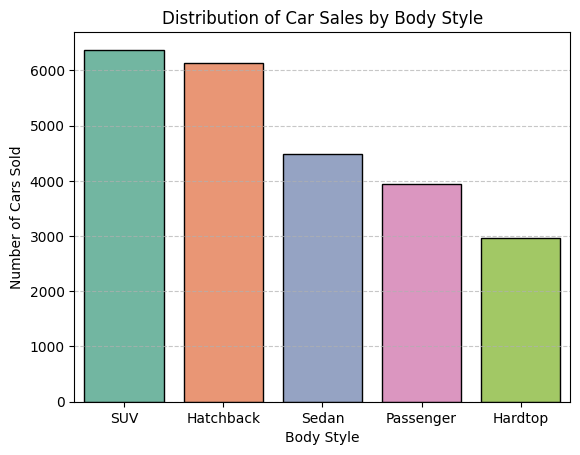

In [82]:
sns.barplot(data=Dist_based_on_bodyStyles, palette='Set2', edgecolor='black')
plt.title('Distribution of Car Sales by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars Sold')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [83]:
# Insights >>
# SUV sold the most, followed by Hatchback and Sedan  .

Q6.  How does the average selling price of cars vary by customer gender and annual income

In [84]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [85]:
df1 =df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()
df1

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

Income Bracket           Low        Medium          High     Very High
Gender                                                                
Female          28059.801521  28353.154717  28309.448449  28402.914851
Male            27924.524014  27837.224550  28283.473409  28091.421784


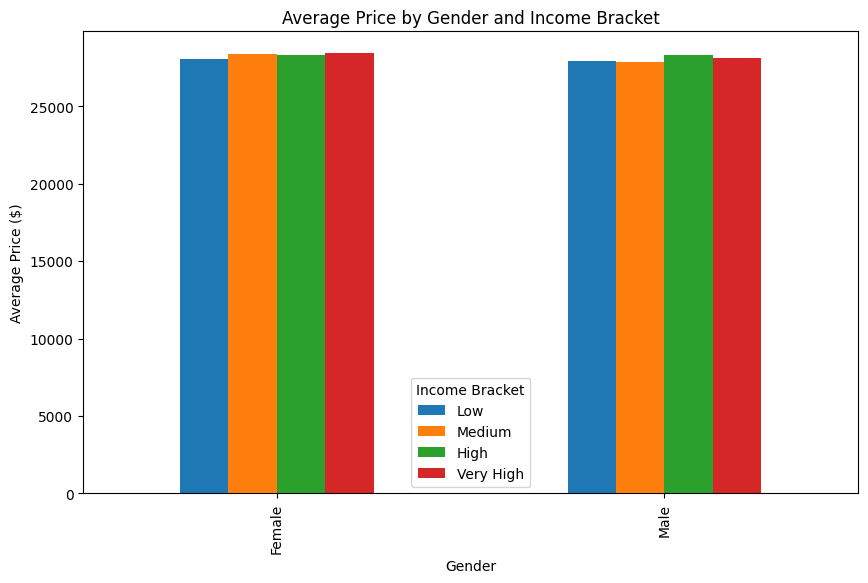

In [86]:
df['Income Bracket'] = pd.qcut(df['Annual Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
avg_price_gender_income = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().unstack()
print(avg_price_gender_income)
avg_price_gender_income.plot(kind='bar', figsize=(10, 6))
plt.title("Average Price by Gender and Income Bracket")
plt.ylabel("Average Price ($)")
plt.show()


Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region ?

In [87]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket'],
      dtype='object')

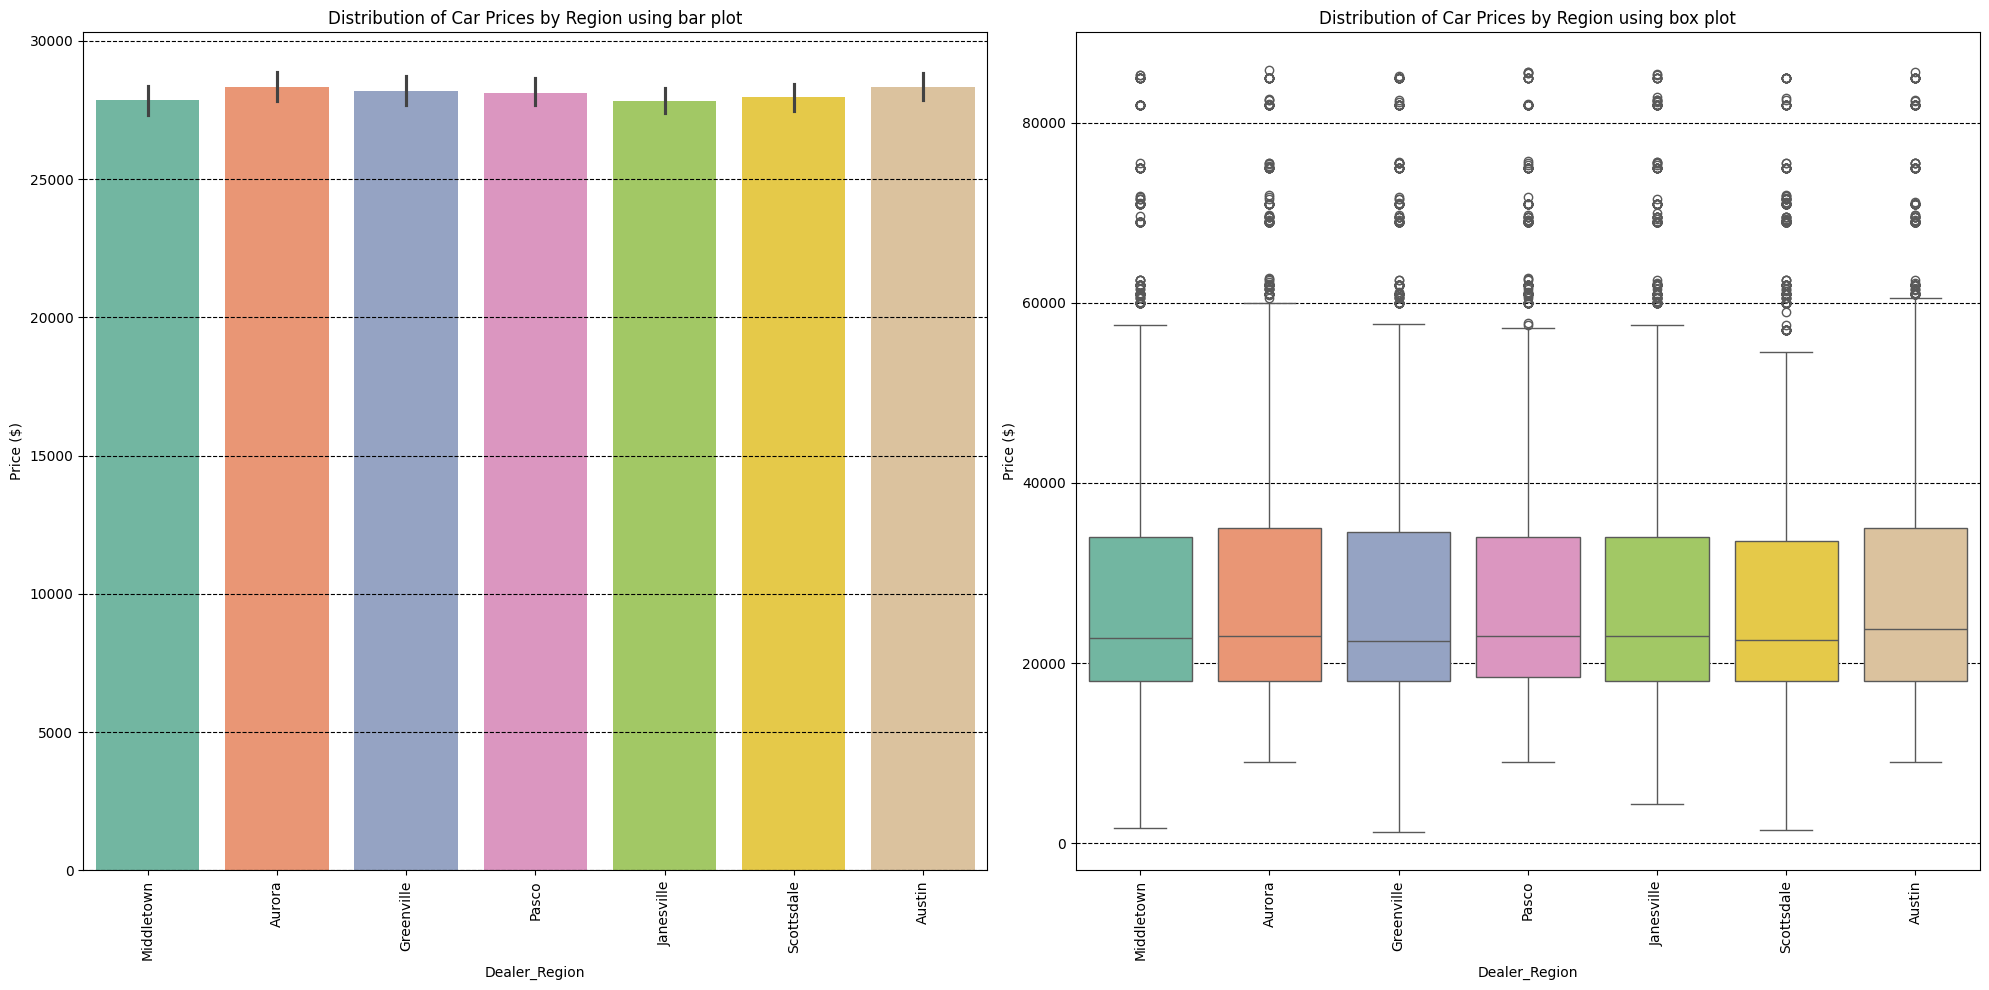

In [91]:

# Bar plot of car prices by dealer region
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(data=df, x='Dealer_Region', y = 'Price ($)', palette='Set2')
plt.title('Distribution of Car Prices by Region using bar plot')
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=1, color='black')  

# Box plot of car prices by dealer region

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Dealer_Region', y = 'Price ($)', palette='Set2')
plt.title('Distribution of Car Prices by Region using box plot')
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=1, color='black')  

plt.tight_layout()
plt.show()

In [ ]:
# Insights >>
# The bar plot shows the average car prices by region, indicating which regions have higher or lower average prices.
# The box plot provides a detailed view of the distribution of car prices within each region, including the median, interquartile range (IQR), and outliers.
# Regions with higher median prices can be identified by the position of the median line within the box.
# The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively.
# Outliers are present in several regions, indicating that there are some cars priced significantly higher or lower than the majority.
# The variability in car prices within each region can be assessed by the height of the boxes and the length of the whiskers.

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


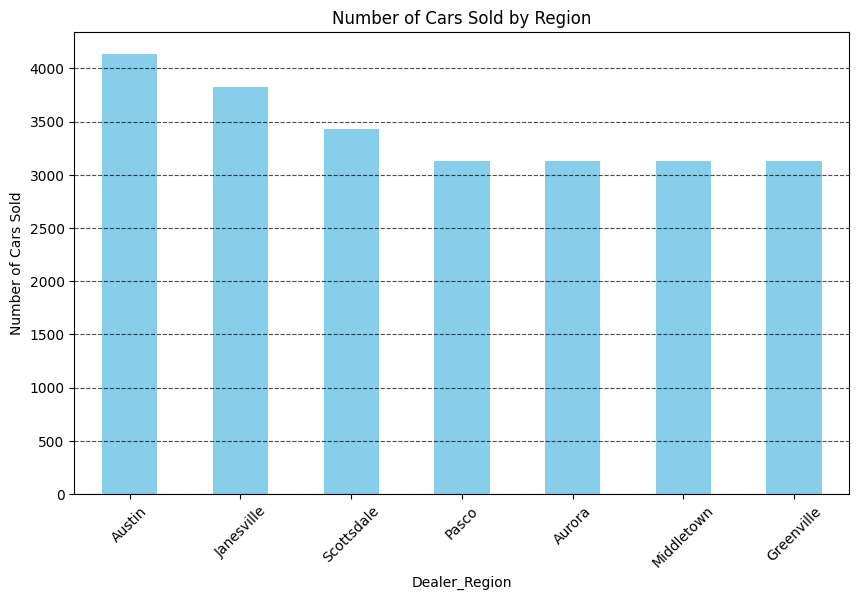

In [99]:
# Sales count by region
region_sales = df['Dealer_Region'].value_counts()
region_sales.plot(kind='bar', figsize=(10, 6), title="Number of Cars Sold by Region", color='skyblue')
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--",color = 'black', alpha=0.7)
print(region_sales)
plt.show()

Q8.  How does the average car price differ between cars with different engine sizes ?

In [92]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket'],
      dtype='object')

In [104]:
avg_price_engine  = df.groupby('Engine')['Price ($)'].mean()
avg_price_engine 

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

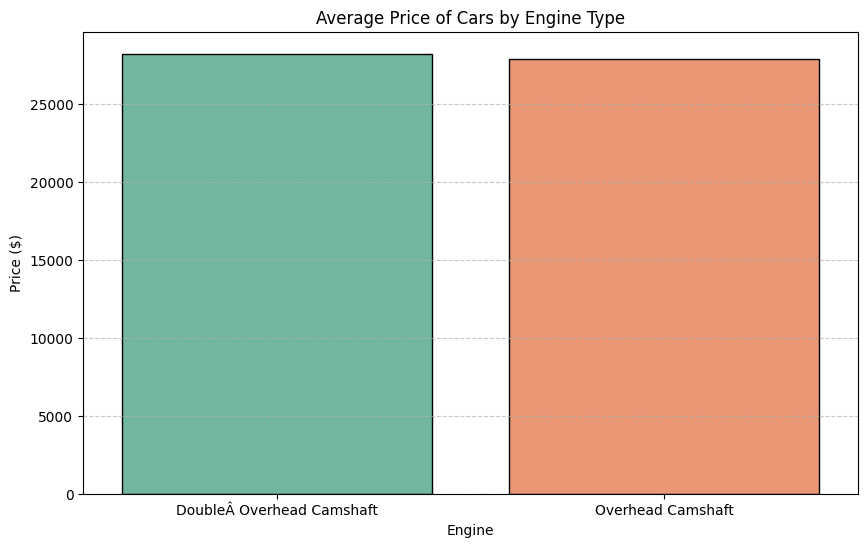

In [110]:
# Graph
plt.figure(figsize=(10,6))
sns.barplot(data=avg_price_engine, palette='Set2', edgecolor='black')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title('Average Price of Cars by Engine Type')
plt.show()

In [111]:
# Insights >>
#  Price of DoubleÂ Overhead Camshaft is more than other Overhead Camshaft .

Q9.  How do car prices vary based on the customer’s annual income bracket ?

In [112]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket'],
      dtype='object')

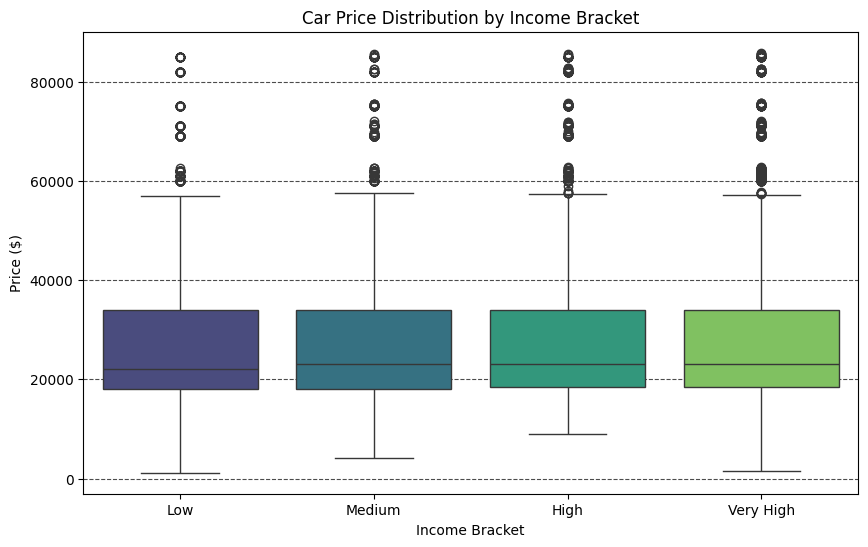

In [115]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Income Bracket', y='Price ($)', palette='viridis')
plt.title('Car Price Distribution by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price ($)')
plt.grid(axis="y", linestyle="--", alpha=0.7, color='black')
plt.show()

In [ ]:
# Insights >>
# 1. The median car price increases with higher income brackets, indicating that customers with higher annual incomes tend to 
#    purchase more expensive cars.
# 2. The interquartile range (IQR) is wider for higher income brackets, suggesting greater variability in car prices within 
#    these groups.
# 3. The lower income brackets have a more consistent range of car prices, with fewer outliers.
# 4. Outliers are present in all income brackets, but they are more prominent in the higher income brackets, indicating that some 
#    customers in these groups purchase cars that are significantly more expensive than the majority.
# 5. The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively.
# 6. The overall trend shows that as annual income increases, so does the price of cars purchased by customers.

Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look ?

In [116]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket'],
      dtype='object')

In [118]:
top_5_models = df['Model'].value_counts().head(5)
top_5_models

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64

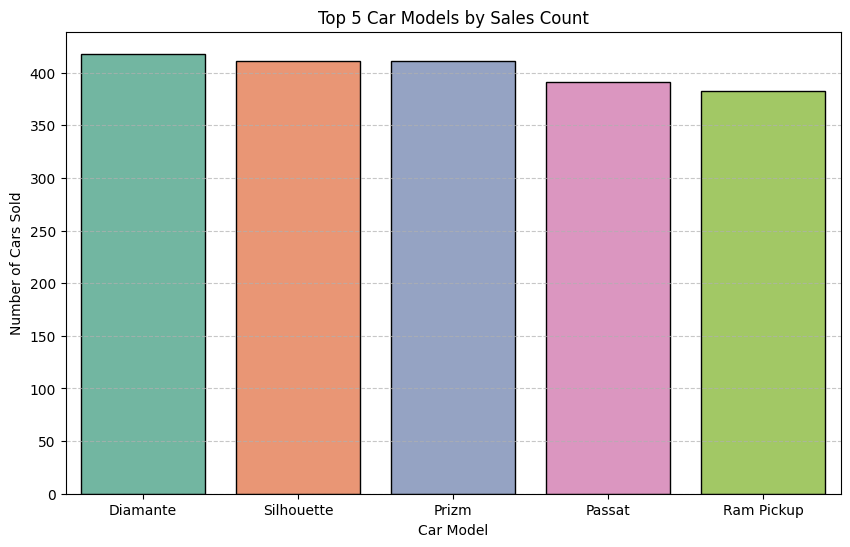

In [122]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_5_models, palette='Set2', edgecolor='black')
plt.title('Top 5 Car Models by Sales Count')
plt.xlabel('Car Model')
plt.ylabel('Number of Cars Sold')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [129]:
# Insights >>
# Diamante is the most sold car model, followed by Silhouette and Prizm.

Q11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation ?

In [130]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket'],
      dtype='object')

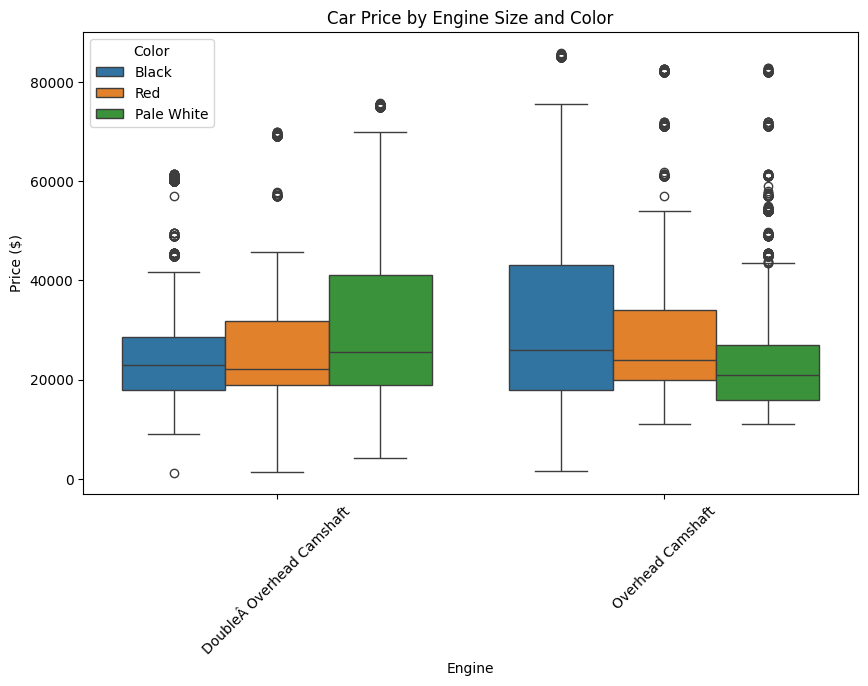

In [133]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Engine', y='Price ($)', hue='Color')

plt.title("Car Price by Engine Size and Color")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Insights >>
# 1. The box plot shows the distribution of car prices for different engine sizes across various colors.
# 2. For each engine type, the median price can be identified by the line within each box.
# 3. The interquartile range (IQR) is represented by the height of each box, showing the range between the 25th and 75th percentiles.
# 4. The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively.
# 5. Outliers are present in several categories, indicating that there are some cars priced significantly higher or lower than the majority.
# 6. Certain colors may have higher median prices for specific engine types, indicating a potential preference or premium for those combinations.
# 7. The variability in car prices within each color and engine type can be assessed by the height of the boxes and the length of the whiskers.
# 8. Colors with higher price variation can be identified by the presence of more outliers and a wider IQR.

Q12. Is there any seasonal trend in car sales based on the date of sale ?

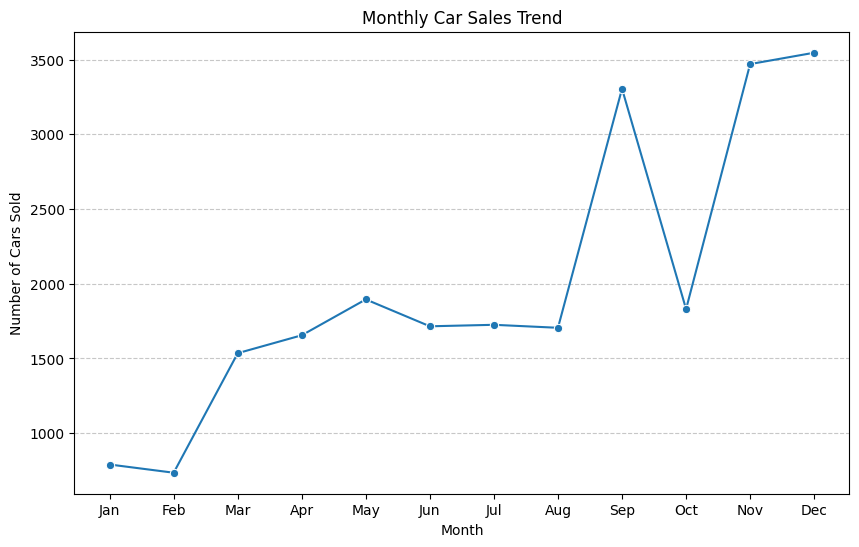

In [145]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Group by month and count the number of cars sold
monthly_sales = df['Month'].value_counts().sort_index()

# Plot the monthly sales
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [140]:
# Insights >>
# Highest sales in the month of December and lowest in the month of February.
# There is a general upward trend in car sales from January to December, with a peak in December.
# The sales trend may be influenced by factors such as seasonal promotions, holidays, and end-of-year incentives.
# There is significant dip in sales in the month of October

Q13. How does the car price distribution change when considering different combinations of body style and
transmission type ?

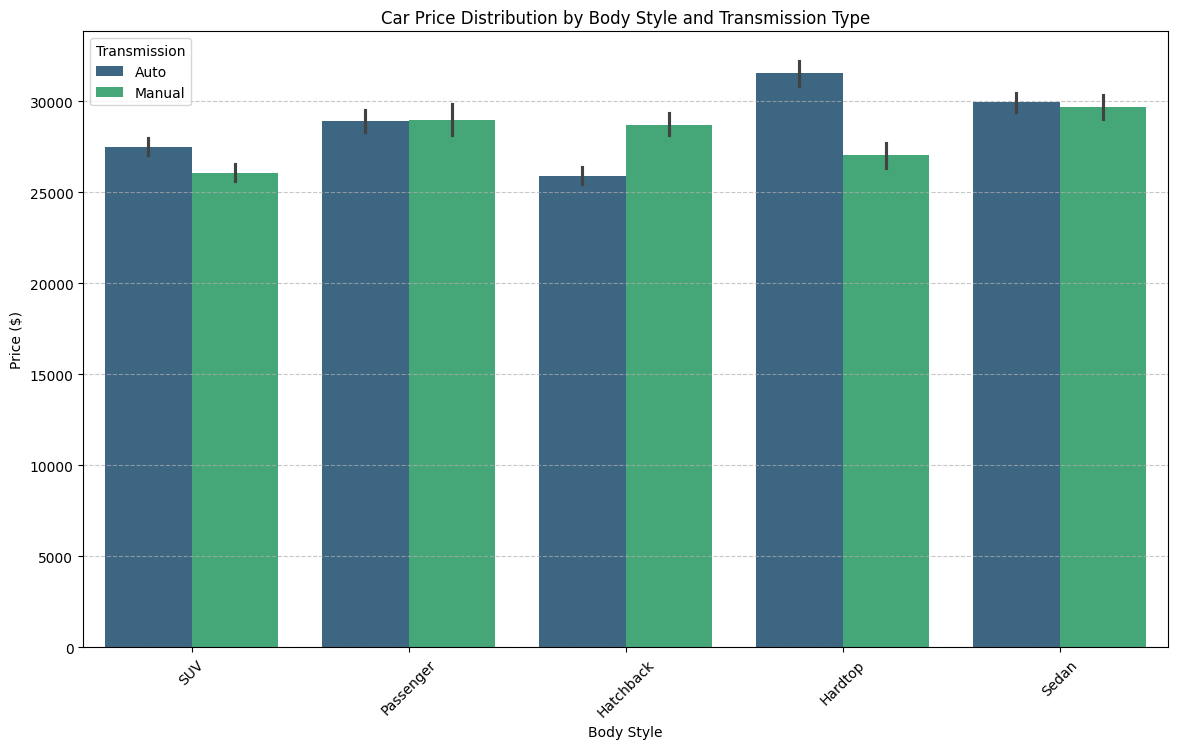

In [147]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='viridis')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title='Transmission')
plt.show()

Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact

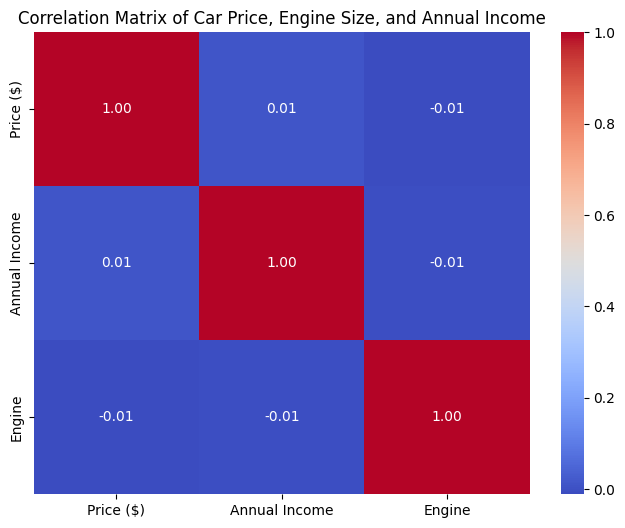

In [150]:
# Select relevant columns for correlation analysis
correlation_data = df[['Price ($)', 'Annual Income']]

# Encode the 'Engine' column to numerical values
correlation_data['Engine'] = df['Engine'].astype('category').cat.codes

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Car Price, Engine Size, and Annual Income')
plt.show()

Q15. How does the average car price vary across different car models and engine types ?

In [151]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket', 'Month'],
      dtype='object')

In [155]:
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
avg_price_model_engine

Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft
Model,,
3-Sep,37986.380117,NaN
3000GT,22764.326923,21770.659864
300M,21394.888889,NaN
323i,16744.632287,21038.162162
328i,21069.149606,38676.177215
...,...,...
Viper,32118.479167,26052.375000
Voyager,22066.026316,33995.678322
Windstar,25145.636364,17100.272727
